# IPL WIN PROBABILITY 

In [1]:
# importing the required libraries 
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
# reading the data using pandas
match = pd.read_csv(r"C:\Users\kadah\Downloads\ipl\matches.csv")
delivery = pd.read_csv(r"C:\Users\kadah\Downloads\ipl\deliveries.csv")

In [3]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
# showing the total number of columns and rows
match.shape

(756, 18)

In [5]:
# showing the top 5 rows
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
# detail info of the data set
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [8]:
# checking the null values
match.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

<Axes: >

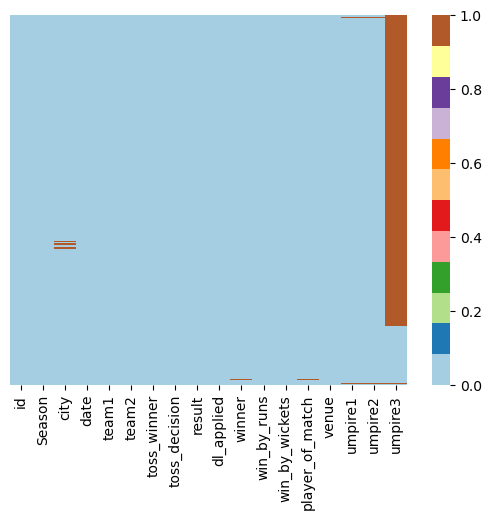

In [9]:
sns.heatmap(match.isnull(),yticklabels=False,cmap="Paired") 

In [10]:
# filling the null values using mode
match['city'].fillna(match['city'].mode()[0], inplace = True)
match['winner'].fillna(match['winner'].mode()[0], inplace = True)
match['player_of_match'].fillna(match['player_of_match'].mode()[0], inplace = True)
match['umpire1'].fillna(match['umpire1'].mode()[0], inplace = True)
match['umpire2'].fillna(match['umpire2'].mode()[0], inplace = True)
match['umpire3'].fillna(match['umpire3'].mode()[0], inplace = True)

<Axes: >

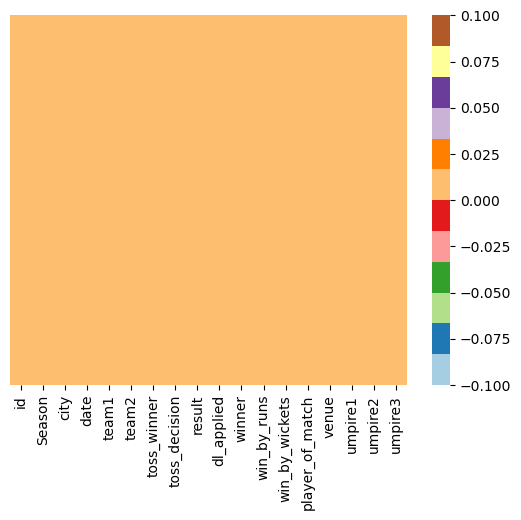

In [11]:
sns.heatmap(match.isnull(),yticklabels=False,cmap="Paired")

In [12]:
# checking the null values
delivery.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [13]:
# filling the null values using mode
delivery['player_dismissed'].fillna(delivery['player_dismissed'].mode()[0], inplace = True)
delivery['dismissal_kind'].fillna(delivery['dismissal_kind'].mode()[0], inplace = True)
delivery['fielder'].fillna(delivery['fielder'].mode()[0], inplace = True)

<Axes: >

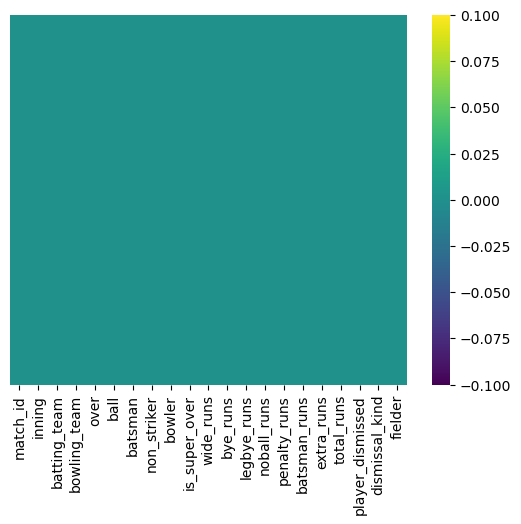

In [14]:
# checking the null values by using heatmap
sns.heatmap(delivery.isnull(),yticklabels=False,cmap="viridis") 

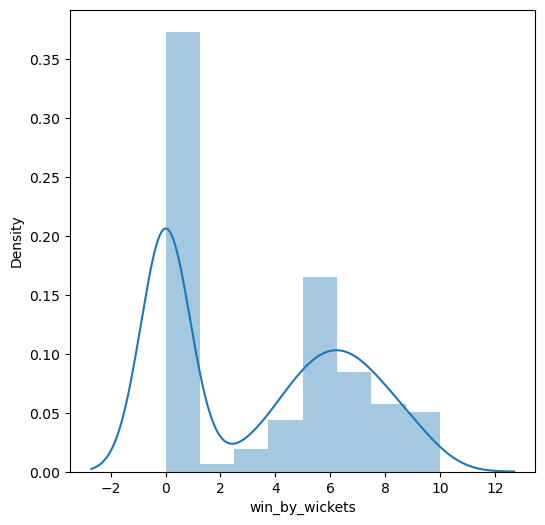

In [15]:
plt.figure(figsize=(6,6))
sns.distplot(match['win_by_wickets'])
plt.show()

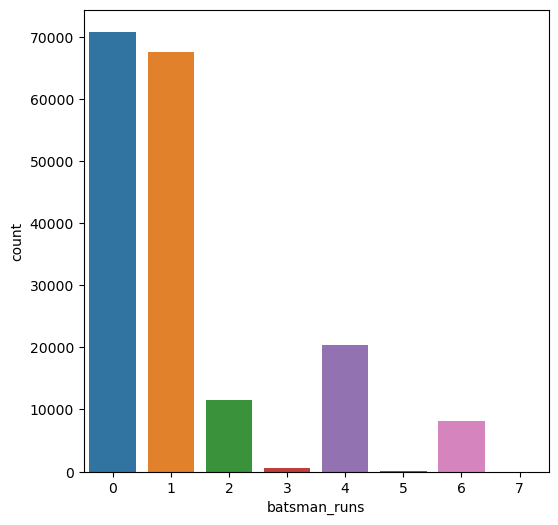

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(x='batsman_runs',data=delivery)
plt.show()

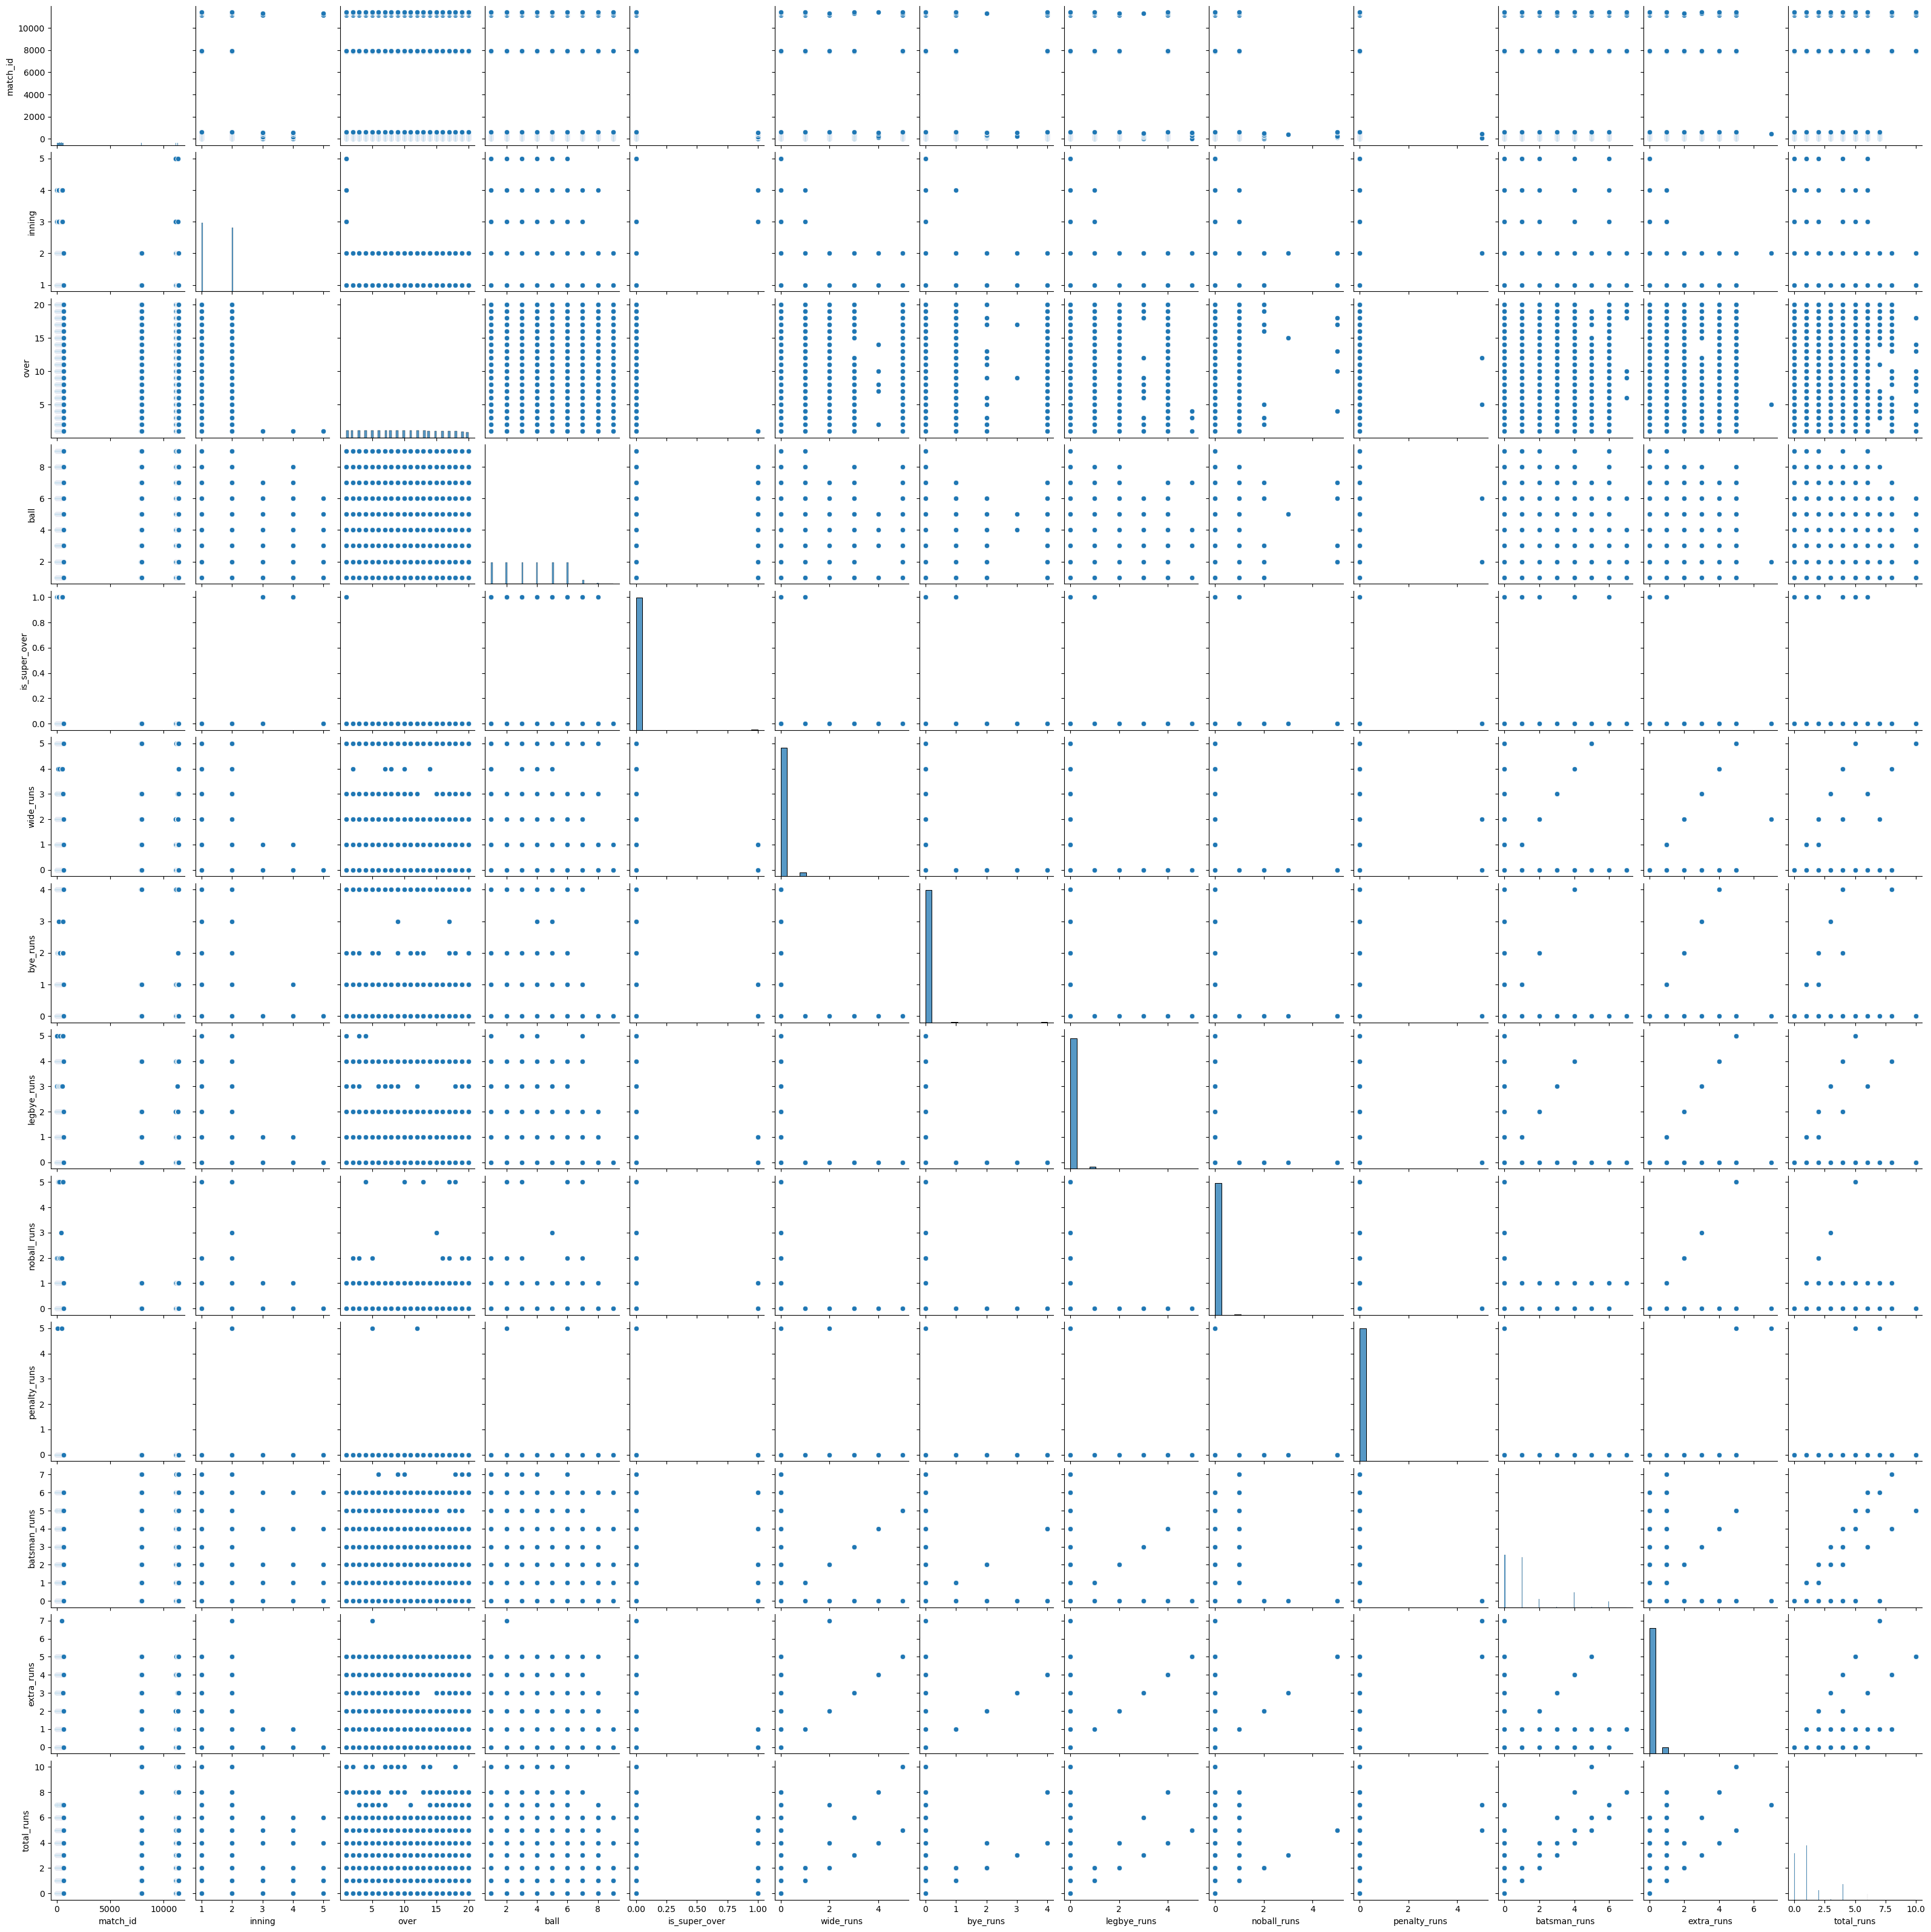

In [17]:
sns.pairplot(delivery)

<Axes: xlabel='batsman_runs', ylabel='extra_runs'>

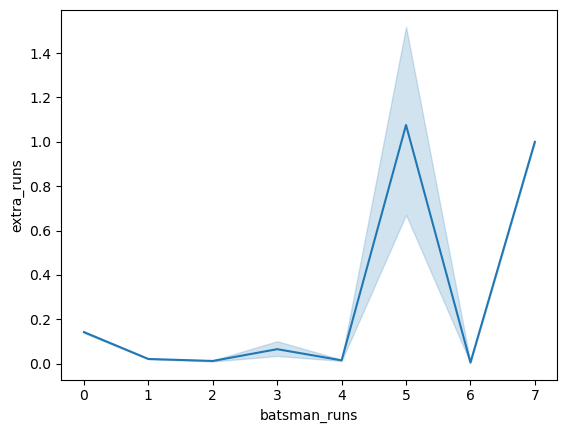

In [18]:
sns.lineplot(y='extra_runs',x="batsman_runs",data=delivery)

In [19]:
a=delivery.groupby("extra_runs")["extra_runs"].count()

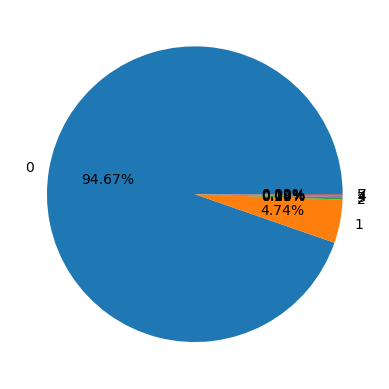

<Figure size 1500x800 with 0 Axes>

In [20]:
plt.pie(a,labels=a.index,autopct="%.2f%%")
plt.figure(figsize = (15,8))
plt.show()

In [21]:
b = match.toss_decision.value_counts()

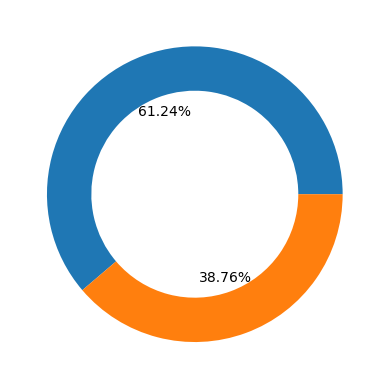

In [22]:
plt.pie(b,wedgeprops=dict(width=0.3),autopct="%.2f%%");
plt.show()

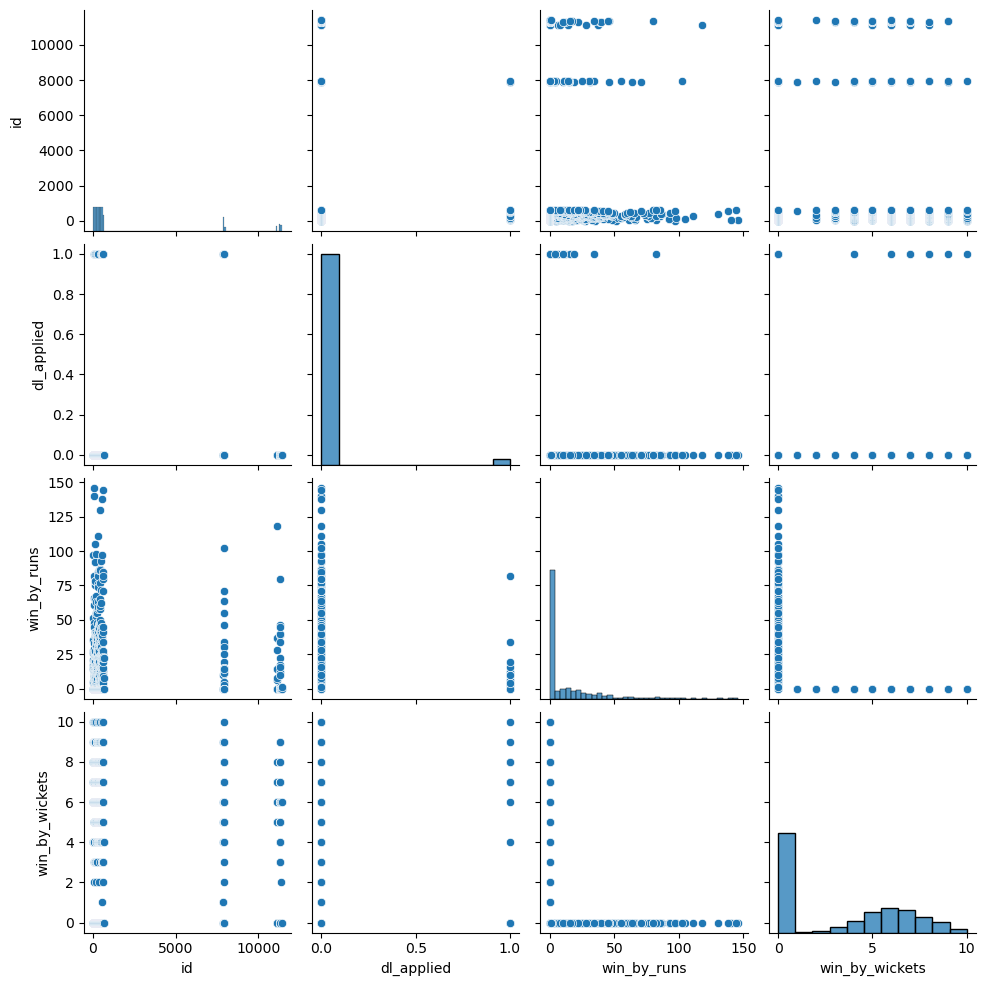

In [23]:
sns.pairplot(match)

<Axes: xlabel='toss_decision', ylabel='Count'>

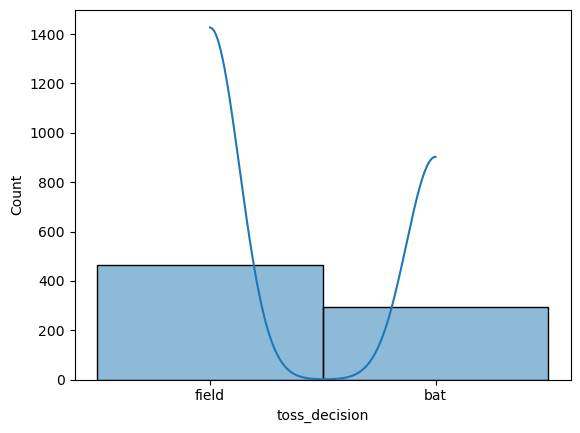

In [24]:
sns.histplot(match["toss_decision"],bins=10,kde=True)

In [25]:
x=delivery.sample(200)

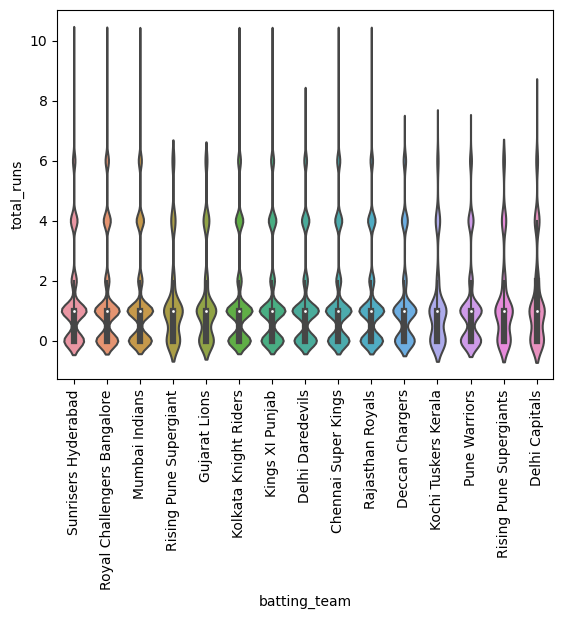

In [26]:
sns.violinplot(x="batting_team",y="total_runs",data=delivery)
plt.xticks(rotation=90)
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Sunrisers Hyderabad'),
  Text(1, 0, 'Royal Challengers Bangalore'),
  Text(2, 0, 'Mumbai Indians'),
  Text(3, 0, 'Rising Pune Supergiant'),
  Text(4, 0, 'Gujarat Lions'),
  Text(5, 0, 'Kolkata Knight Riders'),
  Text(6, 0, 'Kings XI Punjab'),
  Text(7, 0, 'Delhi Daredevils'),
  Text(8, 0, 'Chennai Super Kings'),
  Text(9, 0, 'Rajasthan Royals'),
  Text(10, 0, 'Deccan Chargers'),
  Text(11, 0, 'Kochi Tuskers Kerala'),
  Text(12, 0, 'Pune Warriors'),
  Text(13, 0, 'Rising Pune Supergiants'),
  Text(14, 0, 'Delhi Capitals')])

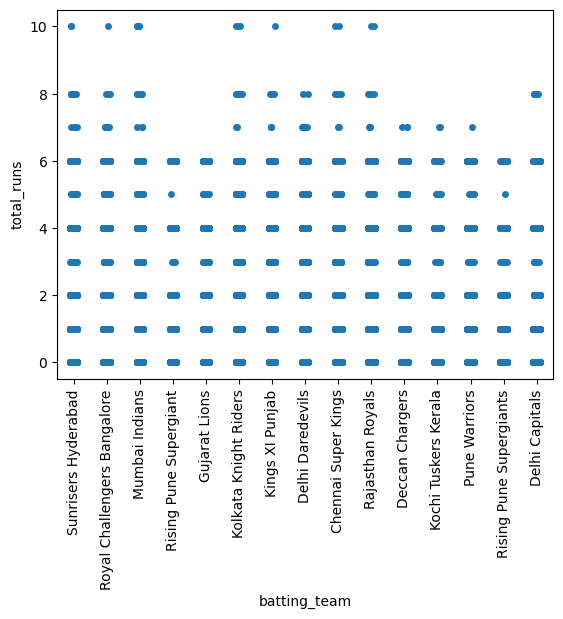

In [27]:
sns.stripplot(x="batting_team",y="total_runs",data=delivery)
plt.xticks(rotation=90)

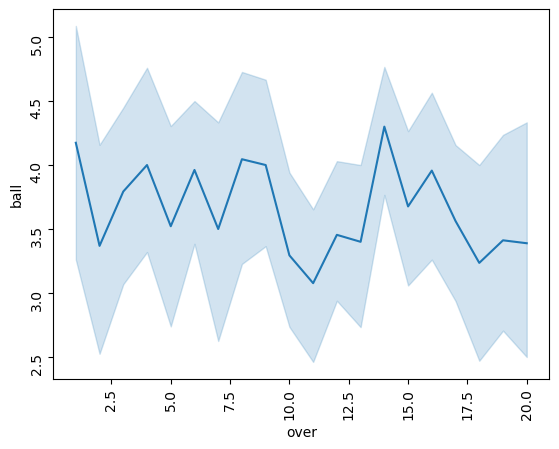

In [28]:
x=delivery.sample(500)
sns.lineplot(x='over',y="ball",data=x)
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.show()

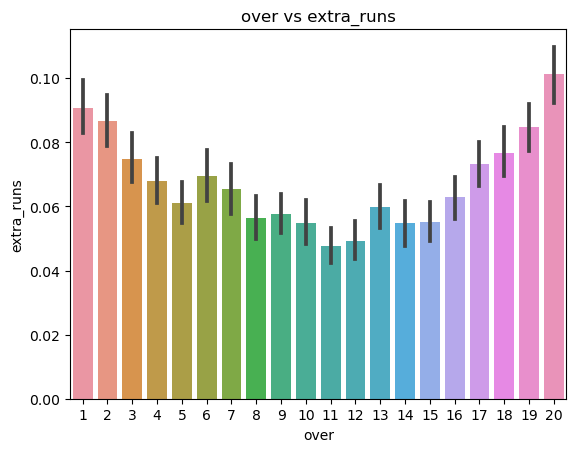

In [29]:
sns.barplot(x='over', y='extra_runs',data=delivery, orient='v')
plt.title ('over vs extra_runs')
plt.show()

In [30]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [31]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [32]:
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [33]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [34]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,C Shamshuddin,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,C Shamshuddin,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,C Shamshuddin,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,C Shamshuddin,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,C Shamshuddin,C Shamshuddin,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,HDPK Dharmasena,C Shamshuddin,C Shamshuddin,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [35]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [36]:
teams = ['Sunrisers Hyderabad','Mumbai Indians','Royal Challengers Bangalore','Kolkata Knight Riders','Kings XI Punjab','Chennai Super Kings','Rajasthan Royals','Delhi Capitals']

In [37]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [38]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [39]:
match_df.shape

(641, 20)

In [40]:
match_df = match_df[match_df['dl_applied'] == 0]

In [41]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [42]:
delivery_df = match_df.merge(delivery,on='match_id')

In [43]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [44]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,SK Raina,caught,MS Dhoni
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,SK Raina,caught,MS Dhoni
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,SK Raina,caught,MS Dhoni
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,SK Raina,caught,MS Dhoni
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,SK Raina,caught,MS Dhoni
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,SK Raina,caught,MS Dhoni
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,SK Raina,caught,MS Dhoni
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,SK Raina,caught,MS Dhoni


In [45]:
#delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']
delivery_df['total_runs_y'] = delivery_df['total_runs_y'].astype(int)  # Convert to int or float based on your data
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [46]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [47]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [48]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,SK Raina,caught,MS Dhoni,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,SK Raina,caught,MS Dhoni,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,SK Raina,caught,MS Dhoni,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,SK Raina,caught,MS Dhoni,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,SK Raina,caught,MS Dhoni,7,200,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,SK Raina,caught,MS Dhoni,152,0,4
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,SK Raina,caught,MS Dhoni,154,-2,3
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-3,2
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,SK Raina,caught,MS Dhoni,157,-5,1


In [53]:
# Convert 'player_dismissed' column to integers before using cumsum
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == '0' else '1')
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')

delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,1,caught,MS Dhoni,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,1,caught,MS Dhoni,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,1,caught,MS Dhoni,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,1,caught,MS Dhoni,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,1,caught,MS Dhoni,7,200,115


In [54]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,1,caught,MS Dhoni,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,1,caught,MS Dhoni,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,1,caught,MS Dhoni,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,1,caught,MS Dhoni,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,1,caught,MS Dhoni,7,200,115


In [55]:
# crr = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [56]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [57]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [58]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [64]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','total_runs_x','crr','rrr','result']]

In [65]:
final_df = final_df.sample(final_df.shape[0])

In [66]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,total_runs_x,crr,rrr,result
115168,Kolkata Knight Riders,Sunrisers Hyderabad,Hyderabad,74,64,142,7.285714,6.9375,1


In [67]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,total_runs_x,crr,rrr,result
58345,Royal Challengers Bangalore,Chennai Super Kings,Chennai,111,39,205,6.962963,17.076923,0
121629,Chennai Super Kings,Mumbai Indians,Mumbai,142,99,169,7.714286,8.606061,1
37678,Chennai Super Kings,Royal Challengers Bangalore,Bangalore,47,7,171,6.584071,40.285714,0
376,Delhi Daredevils,Royal Challengers Bangalore,Bangalore,155,115,157,2.400000,8.086957,0
116823,Kings XI Punjab,Mumbai Indians,Chandigarh,138,77,189,7.116279,10.753247,0
...,...,...,...,...,...,...,...,...,...
64705,Chennai Super Kings,Kings XI Punjab,Chennai,94,75,156,8.266667,7.520000,0
121923,Kings XI Punjab,Delhi Daredevils,Mohali,59,53,172,10.119403,6.679245,1
81556,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,139,103,161,7.764706,8.097087,1
27926,Chennai Super Kings,Rajasthan Royals,Kimberley,35,28,140,6.847826,7.500000,1


In [68]:
final_df.dropna(inplace=True)

In [69]:
final_df = final_df[final_df['balls_left'] != 0]

In [70]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
categorical_cols=['batting_team','bowling_team','city']
encoder=OneHotEncoder(drop='first',sparse=False)
encoder_cols=pd.DataFrame(encoder.fit_transform(final_df[categorical_cols]),columns=encoder.get_feature_names_out(categorical_cols))

In [73]:
numerical_cols=['runs_left','balls_left','total_runs_x','crr','rrr']
scaler=StandardScaler()
scaled_cols=pd.DataFrame(scaler.fit_transform(final_df[numerical_cols]),columns=scaler.get_feature_names_out(numerical_cols))

In [74]:
X=pd.concat([encoder_cols,scaled_cols],axis=1)
Y=final_df['result']

In [75]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=0)

In [76]:
log = LogisticRegression()

In [77]:
log.fit(X_train,Y_train)

LogisticRegression()

In [78]:
print ('Train Score:',log.score(X_train,Y_train))

Train Score: 0.7927152432582226


In [79]:
print ('Test Score:',log.score(X_test,Y_test))

Test Score: 0.7918947003810184


In [80]:
pred_train = log.predict(X_train)
pred_test = log.predict(X_test)

In [81]:
from sklearn import metrics

In [82]:
print(metrics.classification_report(Y_train,pred_train))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78     27411
           1       0.80      0.81      0.80     30326

    accuracy                           0.79     57737
   macro avg       0.79      0.79      0.79     57737
weighted avg       0.79      0.79      0.79     57737



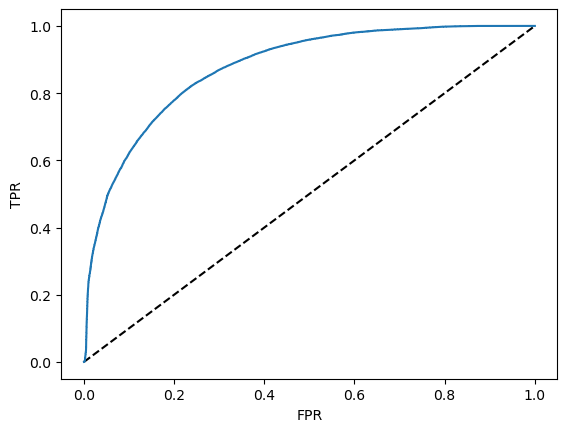

In [83]:
roc = log.predict_proba(X_train)[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_train, roc)
plt.plot([0,1], [0,1],'k--')
plt.plot(fpr, tpr, label='logistic')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [84]:
metrics.roc_auc_score(Y_train, roc)

0.8766450206949764

In [85]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(Y_test, pred_test)
print('MCC: ',mcc)

MCC:  0.5815074764519628


In [86]:
param_grid = {
    'penalty' :['l1','l2'],
    'C' : [0.1,0.5,1,5,10]
}

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
grid = GridSearchCV(estimator=log, param_grid=param_grid, cv = 5)

In [89]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10], 'penalty': ['l1', 'l2']})

In [90]:
best_param = grid.best_params_
best_model = grid.best_estimator_

In [91]:
y_pred = best_model.predict(X_test)

In [92]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [93]:
acc = accuracy_score(Y_test, y_pred)
pre = precision_score(Y_test, y_pred)
rec = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred)

In [94]:
print('Best Param: ', best_param)
print('Accuracy:   ', acc)
print('Recall:     ', rec)
print('Precision:  ', pre)
print('F1 Score:   ', f1)
print('AUC-ROC:    ', roc_auc)

Best Param:  {'C': 0.1, 'penalty': 'l2'}
Accuracy:    0.7916868721856598
Recall:      0.8116242864556306
Precision:   0.8009217769811804
F1 Score:    0.8062375153038212
AUC-ROC:     0.790233133267952
